{0: 784, 1: 759, 2: 685, 3: 662, 4: 511, 5: 360, 6: 296, 7: 115, 8: 29, 9: 35, 10: 31, 11: 29, 12: 23, 13: 27, 14: 25, 15: 28, 16: 20, 17: 16, 18: 22, 19: 27}
{0: 14, 1: 14, 2: 13, 3: 13, 4: 10, 5: 7, 6: 6, 7: 3, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1}


<IPython.core.display.Javascript object>


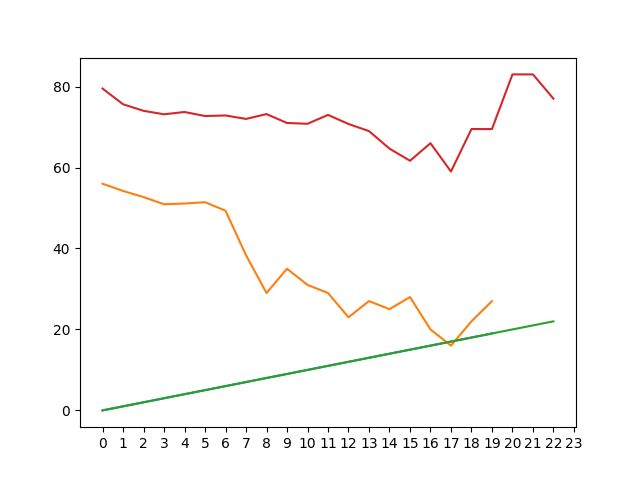

[(0, 56.0), (1, 54.214285714285715), (2, 52.69230769230769), (3, 50.92307692307692), (4, 51.1), (5, 51.42857142857143), (6, 49.333333333333336), (7, 38.333333333333336), (8, 29.0), (9, 35.0), (10, 31.0), (11, 29.0), (12, 23.0), (13, 27.0), (14, 25.0), (15, 28.0), (16, 20.0), (17, 16.0), (18, 22.0), (19, 27.0)]
{0: 636, 1: 605, 2: 518, 3: 512, 4: 516, 5: 509, 6: 510, 7: 360, 8: 366, 9: 355, 10: 354, 11: 292, 12: 283, 13: 276, 14: 194, 15: 185, 16: 132, 17: 118, 18: 139, 19: 139, 20: 83, 21: 83, 22: 77}
{0: 8, 1: 8, 2: 7, 3: 7, 4: 7, 5: 7, 6: 7, 7: 5, 8: 5, 9: 5, 10: 5, 11: 4, 12: 4, 13: 4, 14: 3, 15: 3, 16: 2, 17: 2, 18: 2, 19: 2, 20: 1, 21: 1, 22: 1}
[(0, 79.5), (1, 75.625), (2, 74.0), (3, 73.14285714285714), (4, 73.71428571428571), (5, 72.71428571428571), (6, 72.85714285714286), (7, 72.0), (8, 73.2), (9, 71.0), (10, 70.8), (11, 73.0), (12, 70.75), (13, 69.0), (14, 64.66666666666667), (15, 61.666666666666664), (16, 66.0), (17, 59.0), (18, 69.5), (19, 69.5), (20, 83.0), (21, 83.0), (22,

In [94]:
%matplotlib notebook
import matplotlib.pyplot as plt
import yaml
import os
import numpy as np
from matplotlib.ticker import MaxNLocator

def avg_branching_factor(reports):
    acc = dict()
    num = dict()
    
    if len(reports) > 0:
        for report in reports:
            if isinstance(report, list):
                # old reports --> only an array of reports
                for (depth, val) in enumerate(report):
                    if "choices_num" in val:
                        #print("{}) Branching factor: {}".format(depth,val["choices_num"]))
                        if not depth in acc:
                            acc[depth] = val["choices_num"]
                            num[depth] = 1
                        else:
                            acc[depth] += val["choices_num"]
                            num[depth] += 1
                        
                    elif "tot_childrens" in val:
                        if not depth in acc:
                            acc[depth] = val["tot_childrens"]
                            num[depth] = 1
                        else:
                            acc[depth] += val["tot_childrens"]
                            num[depth] += 1
                        #print("{}) Branching factor: {}".format(depth,val["tot_childrens"]))
                        
    print(acc)
    print(num)
    
    
    plt.xticks(np.arange(30))
    
    avg = list(map(lambda sum,num: (sum[0], sum[1]/num[1]), acc.items(), num.items()))
    print(avg)

    plt.plot(avg)


# main
base_dir = '../../reports'

white_reports = []
black_reports = []

for file in os.listdir(base_dir):
    filename = os.fsdecode(file)
    if filename.endswith(".yaml"):
        with open(base_dir+ "/" +filename) as stream:
            try:
                if filename.startswith("white"):
                    white_reports.append(yaml.safe_load(stream))
                else:
                    black_reports.append(yaml.safe_load(stream))
            except yaml.YAMLError as exc:
                print(exc)
    
    
avg_branching_factor(white_reports)      
avg_branching_factor(black_reports)      


